## Part 1: Understanding Regularization

### 1. What is Regularization in Deep Learning?
- **Definition**: Regularization is a set of techniques used to prevent overfitting by discouraging overly complex models. It adds a penalty to the loss function, which helps to generalize better on unseen data.
- **Importance**: 
  - Helps maintain a balance between fitting the training data well and generalizing to new data.
  - Improves model robustness and performance.

### 2. Bias-Variance Tradeoff
- **Definition**: The bias-variance tradeoff is a fundamental problem in supervised learning where:
  - **Bias** refers to error due to overly simplistic assumptions in the learning algorithm.
  - **Variance** refers to error due to excessive sensitivity to fluctuations in the training dataset.
- **Role of Regularization**: 
  - Regularization techniques reduce variance without significantly increasing bias, leading to a model that generalizes better.

### 3. L1 and L2 Regularization
- **L1 Regularization (Lasso)**:
  - **Penalty Calculation**: Adds the absolute value of the weights as a penalty term (||w||₁ = ∑|wᵢ|).
  - **Effect**: Can lead to sparse models (many weights become zero), effectively selecting features.
  
- **L2 Regularization (Ridge)**:
  - **Penalty Calculation**: Adds the square of the weights as a penalty term (||w||₂² = ∑wᵢ²).
  - **Effect**: Tends to distribute the weights more evenly, preventing any single weight from dominating the model.

### 4. Regularization and Overfitting
- **Role**: Regularization techniques reduce model complexity, preventing the model from fitting noise in the training data.
- **Improvement in Generalization**: Helps the model to perform better on unseen data by focusing on relevant patterns rather than noise.

## Part 2: Regularization Techniques

### 5. Dropout Regularization
- **Concept**: Dropout randomly sets a fraction of input units to zero during training, effectively creating a different network architecture each time.
- **How it Works**: Reduces overfitting by preventing co-adaptation of neurons.
- **Impact on Training and Inference**:
  - **Training**: Models learn robust features by not relying on specific neurons.
  - **Inference**: All neurons are used, and their weights are scaled based on the dropout rate to maintain consistent output.

### 6. Early Stopping
- **Concept**: Early stopping involves monitoring the model's performance on a validation set and halting training when performance degrades, preventing overfitting.
- **Functionality**: 
  - Stops training before the model begins to memorize the training data.
  - Ensures the model maintains the ability to generalize to new data.

### 7. Batch Normalization
- **Concept**: Batch normalization normalizes the inputs of each layer for each mini-batch, stabilizing the learning process.
- **Role as Regularization**: 
  - Reduces internal covariate shift, allowing for faster training.
  - Can act as a regularizer by adding a bit of noise to the input distributions, which can help prevent overfitting.


## Part 3: Applying Regularization

### 8. Implementing Dropout Regularization

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


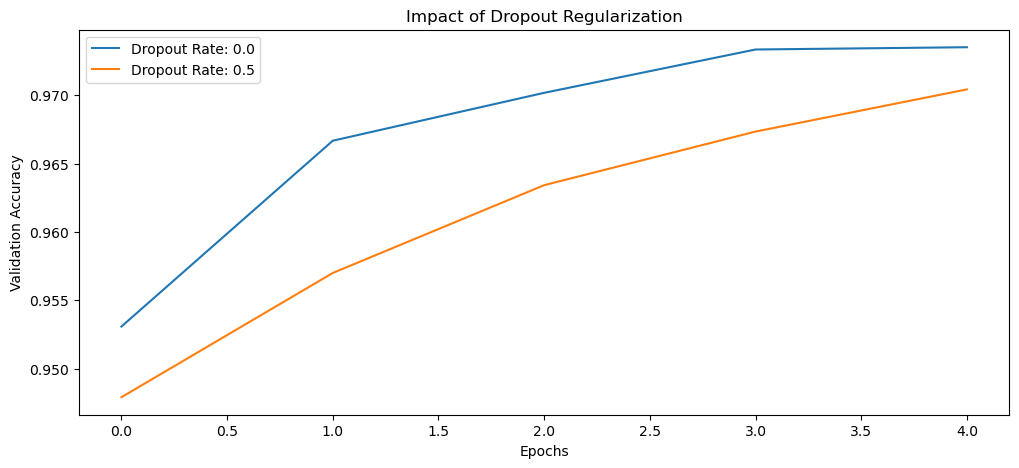

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define a function to create and compile models
def create_model(dropout_rate=0.0):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train models with and without Dropout
dropout_rates = [0.0, 0.5]  # No Dropout and 50% Dropout
results = {}

for rate in dropout_rates:
    model = create_model(dropout_rate=rate)
    history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=0)
    results[rate] = history.history

# Plot the results
plt.figure(figsize=(12, 5))
for rate, history in results.items():
    plt.plot(history['val_accuracy'], label=f'Dropout Rate: {rate}')
plt.title('Impact of Dropout Regularization')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### 9. Considerations and Trade-offs for Choosing Regularization Techniques
- **Model Complexity**: More complex models may require stronger regularization to prevent overfitting.
- **Dataset Size**: Smaller datasets may benefit more from regularization, while larger datasets may not require as much.
- **Training Time**: Techniques like Dropout and Batch Normalization may increase training time due to additional computations.
- **Interpretability**: Techniques like L1 regularization can improve model interpretability by promoting sparsity.